# 大規模データベース論
## 第6章 ビックデータ分析基盤の構築
## 6.1 スキーマレスデータのアドホック分析
### バージョン確認

In [1]:
!mongo --version
# 4.4.1

MongoDB shell version v4.4.1
Build Info: {
    "version": "4.4.1",
    "gitVersion": "ad91a93a5a31e175f5cbf8c69561e788bbc55ce1",
    "modules": [],
    "allocator": "system",
    "environment": {
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


In [2]:
!brew info apache-spark
# 3.0.1

apache-spark: stable 3.0.1, HEAD
Engine for large-scale data processing
https://spark.apache.org/
/usr/local/Cellar/apache-spark/3.0.1 (1,238 files, 238.1MB) *
  Built from source on 2021-01-31 at 23:59:39
From: https://github.com/Homebrew/homebrew-core/blob/HEAD/Formula/apache-spark.rb
License: Apache-2.0
==> Dependencies
Required: openjdk@11 ✔
==> Options
--HEAD
	Install HEAD version
==> Analytics
install: 3,588 (30 days), 10,736 (90 days), 58,936 (365 days)
install-on-request: 3,584 (30 days), 10,688 (90 days), 57,829 (365 days)
build-error: 0 (30 days)


In [3]:
!pip3 show pandas
# 1.1.5

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Name: pandas
Version: 1.1.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /Users/furuhama/Library/Python/3.8/lib/python/site-packages
Requires: numpy, pytz, python-dateutil
Required-by: 


In [4]:
!jupyter-console --version

6.1.0


In [5]:
!java -version
# 11.0.9

openjdk version "11.0.9" 2020-10-20
OpenJDK Runtime Environment (build 11.0.9+11)
OpenJDK 64-Bit Server VM (build 11.0.9+11, mixed mode)


In [6]:
!python3 --version
# 3.8.2

Python 3.8.2


### MongoDBのインストール
本書の情報が古く` $ brew install mongodb` ができないため、https://www.tweeeety.blog/entry/2020/08/23/033501 を参考にインストール。
```
$ brew tap mongodb/brew
$ brew install mongodb-community
```

In [7]:
!mongod --version

db version v4.4.1
Build Info: {
    "version": "4.4.1",
    "gitVersion": "ad91a93a5a31e175f5cbf8c69561e788bbc55ce1",
    "modules": [],
    "allocator": "system",
    "environment": {
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


### MongoDBの起動
```
$ brew services start mongodb-community   # mongdbのバックグランドプロセスを自動起動

$ brew services stop mongodb-community   # 自動起動停止

$ mongo # 起動
```
https://gxliu.hatenablog.com/entry/2020/10/25/201501


### 復習
### Hadoop
- 分散データ処理の共通プラットフォーム
- 単体のソフトウェアでなく、分散システムを構成する多数のソフトウェアからなる集合体

<img src="../figure/IMG_0123.PNG" width="800">

### 分散データ処理

<img src="../figure/IMG_0124.jpg" width="800">

### MapReduce
- 大量のデータをバッチ処理するためのシステム
    - https://software.fujitsu.com/jp/manual/manualfiles/m160011/j2ul1930/02z200/j1930-00-01-01-00.html
- MapReduceはその処理の大半をディスクの読み書きに費やしていた
    - 処理すべきデータ量より少ないメモリしか使えなかったため

### spark
- 使えるメモリ量が増えるとデータをメモリに載せてディスクには何も書かない
    - 異常停止した場合は処理をやり直す
- **プログラム実行中に大量のメモリが必要となるが実行時間は短縮される**
- SparkはHadoopを置き換えるのではなく、MapReduceを置き換える存在

In [8]:
import pymongo
import pandas as pd

In [9]:
mongo = pymongo.MongoClient()
mongo.twitter.sample.find_one()

{'_id': ObjectId('6015a577da278cb58ed9e69e'),
 'delete': {'status': {'id': 1285090306963066880,
   'id_str': '1285090306963066880',
   'user_id': 961050601147658245,
   'user_id_str': '961050601147658245'},
  'timestamp_ms': '1612030429299'},
 '_timestamp': '2021-01-30T18:29:11.017532'}

In [10]:
df = pd.DataFrame(list(mongo.twitter.sample.find()))
df

,_id,delete,_timestamp,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,...,retweeted_status,display_text_range,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,status_withheld
0,6015a577da278cb58ed9e69e,"{'status': {'id': 1285090306963066880, 'id_str...",2021-01-30T18:29:11.017532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6015a577da278cb58ed9e69f,"{'status': {'id': 1328458638567018500, 'id_str...",2021-01-30T18:29:11.160967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6015a577da278cb58ed9e6a0,"{'status': {'id': 1260896131220819969, 'id_str...",2021-01-30T18:29:11.162453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6015a577da278cb58ed9e6a1,"{'status': {'id': 1120784353339031558, 'id_str...",2021-01-30T18:29:11.163781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6015a577da278cb58ed9e6a2,"{'status': {'id': 1343332924012154880, 'id_str...",2021-01-30T18:29:11.165063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35427,6015ad3081ff34d0642d354f,NaN,2021-01-30T19:02:08.309622,Sat Jan 30 19:02:02 +0000 2021,1.355592e+18,1355592123836317696,He was wearing exact denim pollo that he wore ...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,...,NaN,"[0, 140]",NaN,False,1.355588e+18,1355588337394802688,{'created_at': 'Sat Jan 30 18:46:59 +0000 2021...,"{'url': 'https://t.co/kneKLrC1v0', 'expanded':...",{'full_text': 'He was wearing exact denim poll...,NaN
35428,6015ad3081ff34d0642d3550,"{'status': {'id': 1355589947005284355, 'id_str...",2021-01-30T19:02:08.361170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35429,6015ad3081ff34d0642d3551,"{'status': {'id': 1355591985432719361, 'id_str...",2021-01-30T19:02:08.452983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35430,6015ad3081ff34d0642d3552,"{'status': {'id': 1355586629306638338, 'id_str...",2021-01-30T19:02:08.513237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

_id                              0
delete                       13924
_timestamp                       0
created_at                   21509
id                           21509
id_str                       21509
text                         21509
source                       21509
truncated                    21509
in_reply_to_status_id        31315
in_reply_to_status_id_str    31315
in_reply_to_user_id          31260
in_reply_to_user_id_str      31260
in_reply_to_screen_name      31260
user                         21509
geo                          35424
coordinates                  35424
place                        35319
contributors                 35432
is_quote_status              21509
quote_count                  21509
reply_count                  21509
retweet_count                21509
favorite_count               21509
entities                     21509
favorited                    21509
retweeted                    21509
filter_level                 21509
lang                

In [12]:
# MongoDBからレコードを読むジェネレータ関数
def tweets(*args, **kwargs):
    for tweet in mongo.twitter.sample.find(*args, **kwargs):
        if 'delete' not in tweet:
            # 興味のあるフィールドだけをyield
            yield {
                'created_at': tweet['created_at'],
                'text': tweet['text']
            }

In [13]:
pd.DataFrame(tweets({'lang':'en'}))

,created_at,text
0,Sat Jan 30 18:29:06 +0000 2021,RT @Raglant33: these 7 minute long credits for...
1,Sat Jan 30 18:29:06 +0000 2021,@TheGingerarchy White walker
2,Sat Jan 30 18:29:06 +0000 2021,[Question] Can AltDeploy be used on iOS 13.5 h...
3,Sat Jan 30 18:29:06 +0000 2021,RT @Stock_Car_Spec: Season 3 is here!! \nWe di...
4,Sat Jan 30 18:29:06 +0000 2021,RT @TransEthics: By calling cis people cis we ...
...,...,...
4618,Sat Jan 30 19:02:02 +0000 2021,no rips
4619,Sat Jan 30 19:02:02 +0000 2021,@StojyBoy Ccc extra meat\n add bacon\n america...
4620,Sat Jan 30 19:02:02 +0000 2021,@luckyisdesi I was thinking of uncle/auntie as...
4621,Sat Jan 30 19:02:02 +0000 2021,Dr. Hope!😎 https://t.co/xvjurm10dU


In [14]:
# pandasの場合
df = pd.DataFrame(list(mongo.twitter.sample.find({'lang':'en'})))
df[['created_at', 'text']]

,created_at,text
0,Sat Jan 30 18:29:06 +0000 2021,RT @Raglant33: these 7 minute long credits for...
1,Sat Jan 30 18:29:06 +0000 2021,@TheGingerarchy White walker
2,Sat Jan 30 18:29:06 +0000 2021,[Question] Can AltDeploy be used on iOS 13.5 h...
3,Sat Jan 30 18:29:06 +0000 2021,RT @Stock_Car_Spec: Season 3 is here!! \nWe di...
4,Sat Jan 30 18:29:06 +0000 2021,RT @TransEthics: By calling cis people cis we ...
...,...,...
4618,Sat Jan 30 19:02:02 +0000 2021,no rips
4619,Sat Jan 30 19:02:02 +0000 2021,@StojyBoy Ccc extra meat\n add bacon\n america...
4620,Sat Jan 30 19:02:02 +0000 2021,@luckyisdesi I was thinking of uncle/auntie as...
4621,Sat Jan 30 19:02:02 +0000 2021,Dr. Hope!😎 https://t.co/xvjurm10dU


In [15]:
# def return_foo():
#     buf = []
#     for i in range(2):
#         print('評価')
#         buf.append(i)
#     return buf

# def yield_foo():
#     for i in range(2):
#         print('評価')
#         yield i

# for r in return_foo():
#     print(r)
# print('---')
# for y in yield_foo():
#     print(y)

### spark

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext, Row

In [17]:
# df = (spark.read
#       .format("com.mongodb.spark.sql.DefaultSource")
#       .option("uri", "mongodb://localhost/twitter.sample").load())

# header:カラム名を行の先頭に、inferSchema:カラムの型を自動推定
df = spark.read\
                .format("csv")\
                .options(header="True", inferSchema="True")\
                .load("../data/twitter_sample.csv")
df.show(5)

+--------------------+--------------------+--------------------+----------+----+------+----+------+---------+---------------------+-------------------------+-------------------+-----------------------+-----------------------+----+----+-----------+-----+------------+---------------+-----------+-----------+-------------+--------------+--------+---------+---------+------------+----+------------+----------------+------------------+-----------------+------------------+----------------+--------------------+-------------+-----------------------+--------------+---------------+
|                 _id|              delete|          _timestamp|created_at|  id|id_str|text|source|truncated|in_reply_to_status_id|in_reply_to_status_id_str|in_reply_to_user_id|in_reply_to_user_id_str|in_reply_to_screen_name|user| geo|coordinates|place|contributors|is_quote_status|quote_count|reply_count|retweet_count|favorite_count|entities|favorited|retweeted|filter_level|lang|timestamp_ms|retweeted_status|display_text

In [18]:
# データフレームを一時的なビューとして登録
df.createOrReplaceTempView("tweets") 

「データベーススペシャリスト試験」戦略的学習のススメ（17）：SQLで「ビュー作成」を行うより引用
> [ビュー（VIEW）とは、テーブルの特定部分や複数テーブルを結合し、ユーザに必要な部分だけをあたかも一つのテーブルであるかのように見せるための、仮想的なテーブルの概念です。ビューの実体はデータを持たないSQL文であり、CREATE TABLE文で作成する物理的なテーブルとは異なります。](https://www.atmarkit.co.jp/ait/articles/1703/01/news190.html#:~:text=%E3%83%93%E3%83%A5%E3%83%BC%EF%BC%88VIEW%EF%BC%89%E3%81%A8%E3%81%AF%E3%80%81,%E3%83%86%E3%83%BC%E3%83%96%E3%83%AB%E3%81%A8%E3%81%AF%E7%95%B0%E3%81%AA%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82)


In [19]:
"""
WHERE delete IS NULL : deleteカラムがnullのものを抽出
"""
sqlContext.sql("SELECT created_at, text FROM tweets WHERE delete IS NULL").show(10)

+--------------------+--------------------------+
|          created_at|                      text|
+--------------------+--------------------------+
|Sat Jan 30 18:29:...|        🌹🌱🍄🌼🌹🌱🌷🌱🌱|
|                null|                      null|
|                null|                      null|
|                null|                      null|
|                null|                      null|
|                null|                      null|
|Sat Jan 30 18:29:...|      RT @BARABIE_: @ps...|
|Sat Jan 30 18:29:...|@gumic0913 パス伝くそめ...|
|Sat Jan 30 18:29:...|      sdd de quando Mal...|
|Sat Jan 30 18:29:...|      @Marylinda20001 م...|
+--------------------+--------------------------+
only showing top 10 rows



In [20]:
sqlContext.sql("SELECT count(*) count FROM tweets WHERE delete IS NULL").show()

+-----+
|count|
+-----+
|16867|
+-----+



In [21]:
"""
GROUP BY 1 : langをグループごとにまとめる
ORDER BY 2 : countをソートする
DESC : 降順
"""
sqlContext.sql("SELECT lang, count(*) count \
                            FROM tweets \
                            WHERE delete IS NULL \
                            GROUP BY 1 \
                            ORDER BY 2 DESC").show(3)

+----+-----+
|lang|count|
+----+-----+
|null| 5817|
|  en| 3244|
| und| 1192|
+----+-----+
only showing top 3 rows



In [22]:
en_tweets = sqlContext.sql("SELECT from_unixtime(timestamp_ms / 1000) time, text \
                                                    FROM tweets \
                                                    WHERE lang='en'")
en_tweets.show(3)

+-------------------+--------------------+
|               time|                text|
+-------------------+--------------------+
|2021-01-31 03:29:06|RT @Raglant33: th...|
|2021-01-31 03:29:06|[Question] Can Al...|
|2021-01-31 03:29:06|RT @TransEthics: ...|
+-------------------+--------------------+
only showing top 3 rows



In [23]:
# def test_split(row):
#     for word in row.text.split():
#         yield Row(time=row.time, word=word)

def test_split(df):
    new_df = pd.DataFrame(columns=['time', 'word'])
    time_list, word_list = [], []
    for time, text in df.values:
        for word in text.split():
            time_list.append(time)
            word_list.append(word)
    new_df['time'] = time_list
    new_df['word'] = word_list
    return new_df

In [24]:
en_tweets_df = en_tweets.toPandas()
en_tweets_df

,time,text
0,2021-01-31 03:29:06,RT @Raglant33: these 7 minute long credits for...
1,2021-01-31 03:29:06,[Question] Can AltDeploy be used on iOS 13.5 h...
2,2021-01-31 03:29:06,RT @TransEthics: By calling cis people cis we ...
3,2021-01-31 03:29:06,@zvsweet Tweaking it as we Tweet...there's so ...
4,2021-01-31 03:29:06,@Hicozz @KingForever09 It didn’t go to var pro...
...,...,...
3239,2021-01-31 04:02:02,RT @SaraJacobsCA: I can't actually start fires...
3240,2021-01-31 04:02:02,no rips
3241,2021-01-31 04:02:02,@luckyisdesi I was thinking of uncle/auntie as...
3242,2021-01-31 04:02:02,Dr. Hope!😎 https://t.co/xvjurm10dU


In [25]:
# en_tweets.rdd.take(1)　# 一行目を参照

en_tweets_df.head(1)
# en_tweets_df[:1] これでも書ける

,time,text
0,2021-01-31 03:29:06,RT @Raglant33: these 7 minute long credits for...


In [26]:
# en_tweets.rdd.flatMap(test_split).toDF().show(2)
en_tweets_df = test_split(en_tweets_df)
print(en_tweets_df.shape)
en_tweets_df.head(2)

(42582, 2)


,time,word
0,2021-01-31 03:29:06,RT
1,2021-01-31 03:29:06,@Raglant33:


In [27]:
# 型変換できず
# words = spark.createDataFrame(en_tweets_df)

In [28]:
# 一旦保存
en_tweets_df.to_csv('../data/twitter_words.csv', index=False)

In [29]:
words = spark.read\
                .format("csv")\
                .options(header="True", inferSchema="True")\
                .load("../data/twitter_words.csv")
words.show(5)

+-------------------+-----------+
|               time|       word|
+-------------------+-----------+
|2021-01-31 03:29:06|         RT|
|2021-01-31 03:29:06|@Raglant33:|
|2021-01-31 03:29:06|      these|
|2021-01-31 03:29:06|          7|
|2021-01-31 03:29:06|     minute|
+-------------------+-----------+
only showing top 5 rows



In [30]:
# 分解した単語から成るビュー「words」を作成
words.createOrReplaceTempView("words")

In [31]:
sqlContext.sql("SELECT word, count(*) count \
                            FROM words \
                            GROUP BY 1 \
                            ORDER BY 2 DESC").show(3)

+----+-----+
|word|count|
+----+-----+
|  RT| 1445|
| the|  994|
|  to|  785|
+----+-----+
only showing top 3 rows



In [32]:
# 分解した単語をテーブルに保存
# words.write.saveAsTable("twitter_sample_words")

In [33]:
!ls -R spark-warehouse

twitter_sample_words

spark-warehouse/twitter_sample_words:
_SUCCESS
part-00000-6e8f3b9b-4946-4e0e-9445-c61b8ced3e60-c000.snappy.parquet


In [34]:
spark.table("twitter_sample_words").count()
# 42582

42582

In [35]:
"""
substr(文字列, 開始位置, 文字の長さ)
→ 2021-01-31 03
"""

# 一時間ごとに集計し、単語ごとに集約（重複なくす）
sqlContext.sql("SELECT substr(time, 1, 13) time, word, count(*) count \
                            FROM twitter_sample_words \
                            GROUP BY 1, 2").count()

16785

In [36]:
"""
SELECT word, count(*) count FROM twitter_sample_words GROUP BY 1
単語ごとにカウントしたビュー
"""

sqlContext.sql("SELECT t.count, count(*) words \
                            FROM (\
                                SELECT word, count(*) count FROM twitter_sample_words GROUP BY 1\
                            ) t \
                            GROUP BY 1\
                            ORDER BY 1").show(3)

+-----+-----+
|count|words|
+-----+-----+
|    1|12167|
|    2| 1503|
|    3|  611|
+-----+-----+
only showing top 3 rows



In [37]:
# tの中身
sqlContext.sql("SELECT word, count(*) count FROM twitter_sample_words GROUP BY 1").show()

+--------------------+-----+
|                word|count|
+--------------------+-----+
|                  By|    4|
|                some|   47|
|          unlearning|    1|
|          strawberry|    2|
|               still|   40|
|             Dealing|    1|
|https://t.co/7Ptl...|    1|
|                 ...|   15|
|           indicator|    1|
|               those|   18|
|https://t.co/jgBs...|    2|
|    @AccraGtOlympics|    3|
|           theorists|    1|
|         EXCLUSIVELY|    1|
|              LITTLE|    2|
|               inner|    3|
|              harder|    2|
|                Sies|    1|
|                 qrt|    2|
|               trail|    1|
+--------------------+-----+
only showing top 20 rows



In [38]:
"""
IF(条件式, True実行, False実行) 
concat(文字, 列名)で結合
concat(文字,　文字)やconcat(列名, 列名)もできる
"""

word_category = sqlContext.sql("SELECT word, count,\
                                                            IF(count > 500, word, concat('COUNT=', count)) category\
                                                        FROM (\
                                                            SELECT word, count(*) count FROM twitter_sample_words GROUP BY 1\
                                                        ) t ")
word_category.show(3)

+----------+-----+--------+
|      word|count|category|
+----------+-----+--------+
|        By|    4| COUNT=4|
|      some|   47|COUNT=47|
|unlearning|    1| COUNT=1|
+----------+-----+--------+
only showing top 3 rows



In [39]:
# spark.sql(word_category).createOrReplaceTempView("word_category")
word_category.createOrReplaceTempView("word_category")

In [40]:
"""
time:1時間ごとのツイート
category:すべてのデータの中からある単語の出現数（500以上はその単語）
count:データ取得時間ごとのある単語の出現数
"""

query = sqlContext.sql("SELECT substr(time, 1, 13) time, b.category, count(*) count\
                                          FROM twitter_sample_words a\
                                          LEFT JOIN word_category b ON a.word = b.word\
                                          GROUP BY 1,2\
                                        ")
print(query.count())
query.show(5)

224
+-------------+--------+-----+
|         time|category|count|
+-------------+--------+-----+
|2021-01-31 04|COUNT=52|   17|
|2021-01-31 04|COUNT=24|    5|
|2021-01-31 03| COUNT=7|  597|
|2021-01-31 04|COUNT=40|   31|
|2021-01-31 03|COUNT=97|   85|
+-------------+--------+-----+
only showing top 5 rows



In [41]:
# print(sqlContext.sql("SELECT substr(time, 1, 13) time, word, count(*) count FROM twitter_sample_words GROUP BY 1,2 ORDER BY 3 DESC").show())
# print(sqlContext.sql("SELECT word, count(*) count FROM twitter_sample_words GROUP BY 1 ORDER BY 2 DESC").show())

In [42]:
# tsw = sqlContext.sql("SELECT * FROM twitter_sample_words")
# print(tsw.count())
# tsw.show(5)

In [43]:
tsw = sqlContext.sql("SELECT substr(time, 1, 13) time, word, count(*) count \
                                        FROM twitter_sample_words \
                                        GROUP BY 1, 2")
print(tsw.count())
tsw.show(5)

16785
+-------------+--------------------+-----+
|         time|                word|count|
+-------------+--------------------+-----+
|2021-01-31 03|            Telegram|    1|
|2021-01-31 03|               Gavin|    1|
|2021-01-31 03|https://t.co/V7Kq...|    1|
|2021-01-31 03|         @805Weather|    1|
|2021-01-31 03|                room|    7|
+-------------+--------------------+-----+
only showing top 5 rows



In [44]:
wc = sqlContext.sql("SELECT * FROM word_category")
print(wc.count())
wc.show(5)

15569
+----------+-----+--------+
|      word|count|category|
+----------+-----+--------+
|        By|    4| COUNT=4|
|      some|   47|COUNT=47|
|unlearning|    1| COUNT=1|
|strawberry|    2| COUNT=2|
|     still|   40|COUNT=40|
+----------+-----+--------+
only showing top 5 rows



In [45]:
# result = spark.sql(query).toPandas()
result = query.toPandas()
result.head(2)

,time,category,count
0,2021-01-31 04,COUNT=52,17
1,2021-01-31 04,COUNT=24,5


In [46]:
# result['cgry_count'] = [int(r.split('=')[-1]) for r in result['category'].values]
# result['cgry_count'].sum()

In [47]:
result['time'] = pd.to_datetime(result['time'])
result.head(5)

,time,category,count
0,2021-01-31 04:00:00,COUNT=52,17
1,2021-01-31 04:00:00,COUNT=24,5
2,2021-01-31 03:00:00,COUNT=7,597
3,2021-01-31 04:00:00,COUNT=40,31
4,2021-01-31 03:00:00,COUNT=97,85


### 可視化

In [48]:
import matplotlib.pyplot as plt

In [49]:
result = result.sort_values(['count'])
result['count_cumsum'] = result['count'].cumsum()
result['count_per'] = result['count_cumsum'] / result['count'].sum()
result

,time,category,count,count_cumsum,count_per
50,2021-01-31 04:00:00,COUNT=35,1,1,0.000023
135,2021-01-31 04:00:00,COUNT=31,1,2,0.000047
160,2021-01-31 04:00:00,COUNT=38,3,5,0.000117
184,2021-01-31 04:00:00,COUNT=70,3,8,0.000188
159,2021-01-31 04:00:00,COUNT=37,4,12,0.000282
...,...,...,...,...,...
209,2021-01-31 03:00:00,RT,1275,26109,0.613146
146,2021-01-31 04:00:00,COUNT=1,1385,27494,0.645672
62,2021-01-31 03:00:00,COUNT=3,1621,29115,0.683740
174,2021-01-31 03:00:00,COUNT=2,2685,31800,0.746794


In [50]:
result_pivot = pd.pivot_table(result, index='time', columns='category')['count']
result_pivot

category,COUNT=1,COUNT=10,COUNT=107,COUNT=11,COUNT=112,COUNT=113,COUNT=12,COUNT=120,COUNT=121,COUNT=127,...,COUNT=93,COUNT=96,COUNT=97,COUNT=98,I,RT,a,and,the,to
time,,,,,,,,,,,,,,,,,,,,,
2021-01-31 03:00:00,10782,387,93,462,100,99,355,102,102,109,...,162,82,85,88,455,1275,592,474,861,685
2021-01-31 04:00:00,1385,53,14,44,12,14,53,18,19,18,...,24,14,12,10,70,170,79,59,133,100


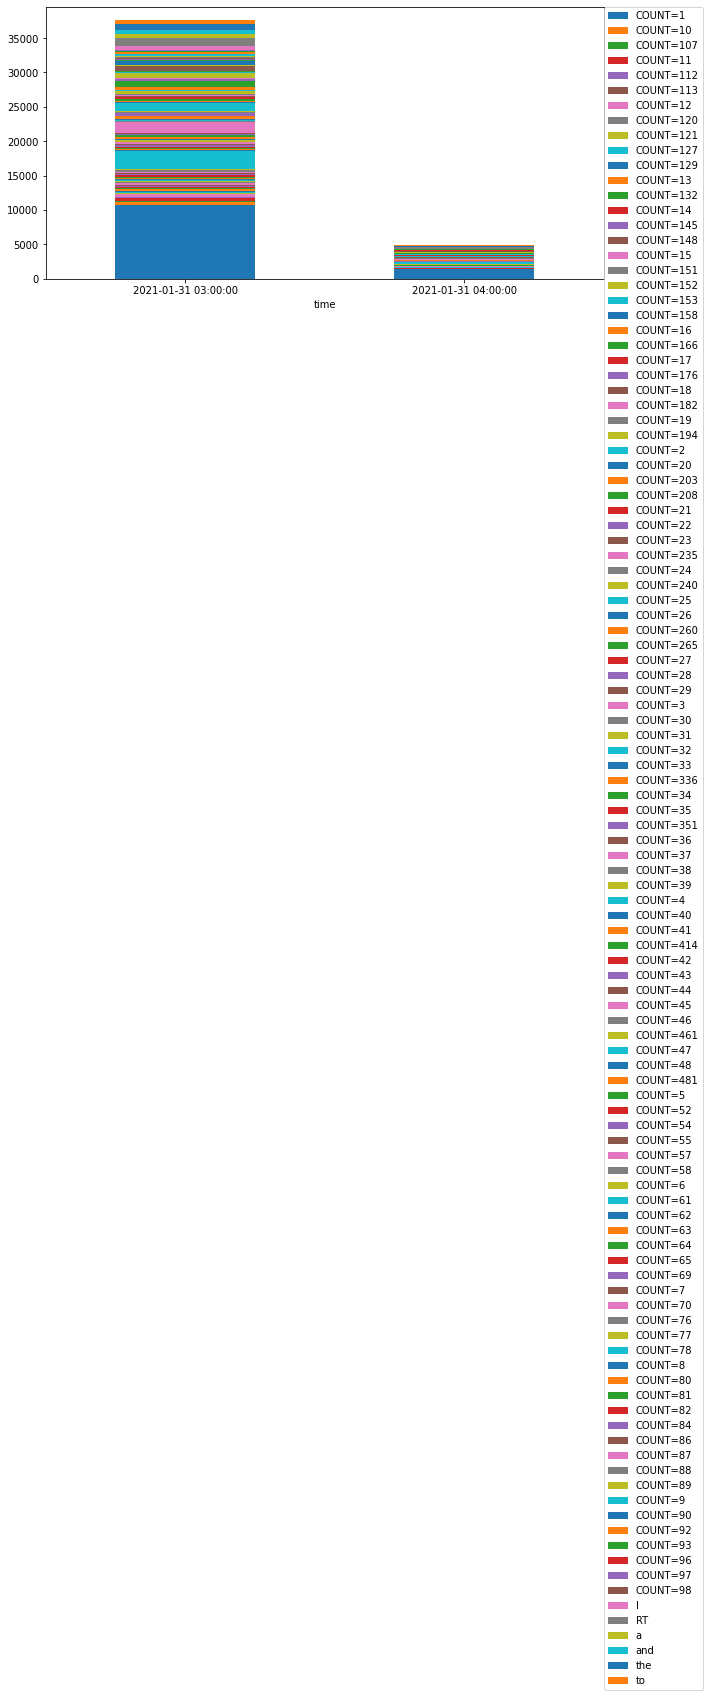

In [51]:
result_pivot.plot.bar(figsize=(10,5), stacked=True)

plt.legend(loc='upper left',
        bbox_to_anchor=(1, 1), 
        borderaxespad=0.,)
plt.xticks(rotation=0)
plt.show()

In [52]:
result['category_grouping'] = result['category'].apply(lambda x : int(x.split('=')[-1]) if x.split('=')[0]=='COUNT' else -1)
result.loc[(result['category_grouping']>=0)&(result['category_grouping']<=100), 'cg'] = 'cg1~100'
result.loc[(result['category_grouping']>100)&(result['category_grouping']<=200), 'cg'] = 'cg101~200'
result.loc[(result['category_grouping']>200)&(result['category_grouping']<=300), 'cg'] = 'cg201~300'
result.loc[(result['category_grouping']>300)&(result['category_grouping']<=400), 'cg'] = 'cg301~400'
result.loc[(result['category_grouping']>400)&(result['category_grouping']<=500), 'cg'] = '401~500'
result.loc[(result['category']=='I'), 'cg'] = 'I'
result.loc[(result['category']=='RT'), 'cg'] = 'RT'
result.loc[(result['category']=='a'), 'cg'] = 'a'
result.loc[(result['category']=='and'), 'cg'] = 'and'
result.loc[(result['category']=='the'), 'cg'] = 'the'
result.loc[(result['category']=='to'), 'cg'] = 'to'
result

,time,category,count,count_cumsum,count_per,category_grouping,cg
50,2021-01-31 04:00:00,COUNT=35,1,1,0.000023,35,cg1~100
135,2021-01-31 04:00:00,COUNT=31,1,2,0.000047,31,cg1~100
160,2021-01-31 04:00:00,COUNT=38,3,5,0.000117,38,cg1~100
184,2021-01-31 04:00:00,COUNT=70,3,8,0.000188,70,cg1~100
159,2021-01-31 04:00:00,COUNT=37,4,12,0.000282,37,cg1~100
...,...,...,...,...,...,...,...
209,2021-01-31 03:00:00,RT,1275,26109,0.613146,-1,RT
146,2021-01-31 04:00:00,COUNT=1,1385,27494,0.645672,1,cg1~100
62,2021-01-31 03:00:00,COUNT=3,1621,29115,0.683740,3,cg1~100
174,2021-01-31 03:00:00,COUNT=2,2685,31800,0.746794,2,cg1~100


In [53]:
result_pivot = pd.pivot_table(result, index='time', columns='cg')['count']
result_pivot

cg,401~500,I,RT,a,and,cg101~200,cg1~100,cg201~300,cg301~400,the,to
time,,,,,,,,,,,
2021-01-31 03:00:00,402.0,455.0,1275.0,592.0,474.0,126.722222,363.350649,209.833333,306.5,861.0,685.0
2021-01-31 04:00:00,50.0,70.0,170.0,79.0,59.0,16.944444,46.896104,25.333333,37.0,133.0,100.0


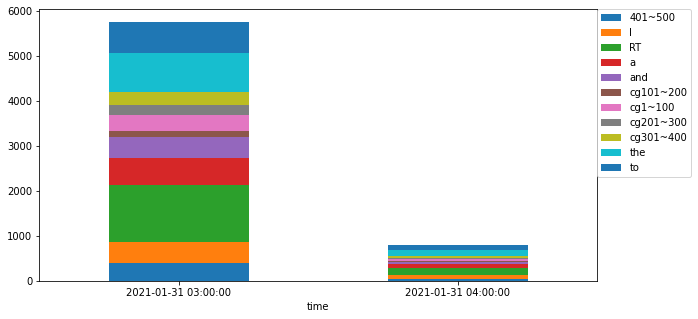

In [54]:
result_pivot.plot.bar(figsize=(10,5), stacked=True)

plt.legend(loc='upper left',
        bbox_to_anchor=(1, 1), 
        borderaxespad=0.,)
plt.xticks(rotation=0)
plt.show()

### 所感

- 今回のツイッターのテキストデータは本よりも少ないため、あまりsparkの良さを伝えられなかった
    - データ数が少なければpandasでも大体の処理は実装できそう

- ビッグデータだと話は代わり、pandasでは処理が重くて時間がかかる
    - 米アマゾンの商品口コミデータ(食品カテゴリー、約15万レビュー)
        - https://techblog.nhn-techorus.com/archives/7301
    - 口コミのテキストデータから形容詞を抽出する前処理
        - pandas:約70分
        - spark:約8分

### 参考文献
### 【mongodb】Mac OSにmongodbをinstallするメモ
- https://www.tweeeety.blog/entry/2020/08/23/033501

### 【2020年版】Java JDK のインストール方法（Windows & Mac対応）
- https://codeforfun.jp/how-to-install-java-jdk-on-windows-and-mac/

### macOS CatalinaにMongoDBをインストール
- https://gxliu.hatenablog.com/entry/2020/10/25/201501


### mongdbターミナル操作
- https://www.i-ryo.com/entry/2020/08/06/081452

### MapReduce
- https://software.fujitsu.com/jp/manual/manualfiles/m160011/j2ul1930/02z200/j1930-00-01-01-00.html

### PandasよりSpark
- https://techblog.nhn-techorus.com/archives/7301

### Spark
- https://qiita.com/taka4sato/items/4ab2cf9e941599f1c0ca